# Dynamic Topic Model

- Construct the input data from the preprocessed text data to apply to gensim
- Inputs for gensim: time_slice, dictionary, corpus
- Set the range for the hypothetical number of topics and then run Dynamic Topic Model
- Determine the number of topics based on the coherence scores
- Visualization and analysis of the results

## 1. Constructing the input data to apply to gensim

In [1]:
# Loading the preprocessed news data
import pandas as pd
import pickle

with open("data/trade_201709_201803.pk", "rb") as f:
    input_data = pickle.load(f)

input_data.reset_index(drop = True, inplace = True)
print(input_data.head())
print(input_data.tail())
print(input_data.info())

                                                date  \
0  [2017-09-04 00:00:00, 2017-09-04 00:00:00, 201...   
1  [2017-09-11 00:00:00, 2017-09-11 00:00:00, 201...   
2  [2017-09-18 00:00:00, 2017-09-18 00:00:00, 201...   
3  [2017-09-25 00:00:00, 2017-09-25 00:00:00, 201...   
4  [2017-10-02 00:00:00, 2017-10-02 00:00:00, 201...   

                                               title  \
0  [현대ㆍ기아, 中진출 협력업체 2500억 선지급, 대외경제정책연구원 “한미FTA 폐...   
1  [​美 압박에도 韓 철강수출 감소 미미, [오늘의포인트]코스피, IT 타고 변곡점 ...   
2  [세계로TV 김원기 대표, 베트남 금융 산업 탐방, 아모레퍼시픽 '모바일 포스(PO...   
3  [인하대 GTEP ‘우크라이나 화장품 시장’ 개척 활동 시장조사 보고서 발간, KE...   
4  [김동연 부총리 "FTA, 국익 최우선에 열린 자세로 美와 협의", 광주시, '20...   

                                            contents  
0  [[투자, 간담회, 한국, 백운규, 협력, 업체, 중국, 카젬, 수설, 사드, 자동...  
1  [[미국, 한국, 강사, 송재빈, 산업, 통상, 자원, 한국, 철강, 협회, 개년,...  
2  [[베트남, 증권사, 활성, 인도네시아, 무역, 흑자, 위도, 제조업, 사이, 공증...  
3  [[화장품, 우크라, 보고서, 개월, 동유럽, 인하, 전문가, 디엠, 스메, 박람회...  
4  [[김동연, 부총리, 위원장, 과기부, 워싱턴, 특별, 회기, 대외, 경제, 장관,..

In [2]:
input_data

date  \
0   [2017-09-04 00:00:00, 2017-09-04 00:00:00, 201...   
1   [2017-09-11 00:00:00, 2017-09-11 00:00:00, 201...   
2   [2017-09-18 00:00:00, 2017-09-18 00:00:00, 201...   
3   [2017-09-25 00:00:00, 2017-09-25 00:00:00, 201...   
4   [2017-10-02 00:00:00, 2017-10-02 00:00:00, 201...   
5   [2017-10-09 00:00:00, 2017-10-09 00:00:00, 201...   
6   [2017-10-16 00:00:00, 2017-10-16 00:00:00, 201...   
7   [2017-10-23 00:00:00, 2017-10-23 00:00:00, 201...   
8   [2017-10-30 00:00:00, 2017-10-30 00:00:00, 201...   
9   [2017-11-06 00:00:00, 2017-11-06 00:00:00, 201...   
10  [2017-11-13 00:00:00, 2017-11-13 00:00:00, 201...   
11  [2017-11-20 00:00:00, 2017-11-20 00:00:00, 201...   
12  [2017-11-27 00:00:00, 2017-11-27 00:00:00, 201...   
13  [2017-12-04 00:00:00, 2017-12-04 00:00:00, 201...   
14  [2017-12-11 00:00:00, 2017-12-11 00:00:00, 201...   
15  [2017-12-18 00:00:00, 2017-12-18 00:00:00, 201...   
16  [2017-12-25 00:00:00, 2017-12-25 00:00:00, 201...   
17                                2018-01-02 00:00:00   
18                                2018-01-11 00:00:00   
19                                2018-01-17 00:00:00   
20                                2018-01-22 00:00:00   
21                                2018-01-29 00:00:00   
22                                2018-02-05 00:00:00   
23                                2018-02-12 00:00:00   
24                                2018-02-19 00:00:00   
25                                2018-02-26 00:00:00   
26                                2018-03-05 00:00:00   
27                                2018-03-12 00:00:00   
28                                2018-03-19 00:00:00   
29                                2018-03-26 00:00:00   
30                                2018-04-02 00:00:00   

                                                title  \
0   [현대ㆍ기아, 中진출 협력업체 2500억 선지급, 대외경제정책연구원 “한미FTA 폐...   
1   [​美 압박에도 韓 철강수출 감소 미미, [오늘의포인트]코스피, IT 타고 변곡점 ...   
2   [세계로TV 김원기 대표, 베트남 금융 산업 탐방, 아모레퍼시픽 '모바일 포스(PO...   
3   [인하대 GTEP ‘우크라이나 화장품 시장’ 개척 활동 시장조사 보고서 발간, KE...   
4   [김동연 부총리 "FTA, 국익 최우선에 열린 자세로 美와 협의", 광주시, '20...   
5   [김동연 "FTA,국익 우선해 의연하게 대처 美서 3대 신평사 회동할 것", [FT...   
6   [[아세안 50년, 변방에서 중심으로] 동남아도 국익 앞엔 냉정... 현지 기업과 ...   
7   [경북 구미시 전기차 전장부품 시장 선점 한다, [아세안 50년, 변방에서 중심으로...   
8   [[사설] 막 오른 코스피 2500 시대 경제 활력 살리는 계기돼야, 코스피, '2...   
9   [화승소재, 고무업계 최초 ‘기술설명회’, 기업은행 “내년 경제성장률 2.7% 전망...   
10  [[2018 한국경제전망]수출 호황 내년에도 계속된다, 현대경제연구원장에 이동근 대...   
11  [백악관 파워맨된 라이트하이저, 추미애 "美 정치권, 전술핵 재배치 동의 안해", ...   
12  [허창수 전경련 회장 “한국, 아세안 인프라 사업 훌륭한 파트너 될 것”, 전경련 ...   
13  [부산시, 중국과 교류협력사업 ‘재가동’, 이공계 전용? 국제무역 배우는 마이스터고...   
14  [미국 관세 폭탄에 국내 기업들 잇따라 소송, 내년 토지보상금 16조 땅 시장에 큰...   
15  ["한 미FTA 재협상서 자동차시장 추가 개방 가능", '사드냉기' 가고 '방중훈풍...   
16  [[A to Z로 풀어본 2017년] 세계 금융시장 비트코인 광풍 국내는 북핵위기 ...   
17              [서울경제TV 해외선물의 신, 해외선물 팀셰르파 쎈(SEN) 시황]   
18  [서울경제TV 해외선물의 신, 해외선물 팀셰르파 쎈(SEN) 시황, 文대통령 스마트...   
19  [김치 무역적자 작년 사상 최대, 中선전거래소, '블록체인'으로 주가 띄우는 기업 ...   
20  [산은, 상반기 인사 "혁신성장본부 보강, 여성 전진 배치", 경기도와 손잡으면 아...   
21  [초대형IB 선두주자 한국투자證 , 올해도 이익 40%↑, 부산시, 제조업 위기대응...   
22  [한국 VC 대표단, 이스라엘 방문 사전 세미나, [이재용 2심 선고] 휴~ 숨돌린...   
23  [쿠쿠는 '렌털' vs 쿠첸은 '유아 가전'  사업다각화로 승부, 코트라 지역 전문...   
24  [美 中 싸움에 한국이 '새우등' 무역제재 현실화?, 문 대통령 "불합리한 美 통상...   
25  [보호무역 확산에  중견 중소업체들도 '한겨울', ‘보호무역 매파’ 美 통상정책 전...   
26  [[MT리포트]美中 무역전쟁 소용돌이 휘말린 한국, 김동연 부총리 “통상 위기, 전...   
27  [사흘새 中 고위급 연쇄 방한, [지평선] 멋대로 트럼프, 美 법원 “포스코 관세부...   
28  [김동연 “철강 관세 면제해 달라” 므누신 “한국 입장 반영되도록 노력”, [사설]...   
29  [한미FTA, 자동차만 희생양, "미중 무역전쟁, 확전보단 협상 가능성", [사설]...   
30  [[사설] 미ㆍ중 무역전쟁 본격화, 범정부 대응체계 서둘러 다듬어야, 중국, 트럼프...   

                                             contents  
0   [[투자, 간담회, 한국, 백운규, 협력, 업체, 중국, 카젬, 수설, 사드, 자동...  
1   [[미국, 한국, 강사, 송재빈, 산업, 통상, 자원, 한국, 철강, 협회, 개년,...  
2   [[베트남, 증권사, 활성, 인도네시아, 무역, 흑자, 위도, 제조업, 사이, 공증...  
3   [[화장품, 우크라, 보고서, 개월, 동유럽, 인하, 전문가, 디엠, 스메, 박람회...  
4   [[김동연, 부총리, 위원장, 과기부, 워싱턴, 특별, 회기, 대외, 경제, 장관,...  
5   [[부총리, 혁신, 성장, 김동연, 일자리, 평사, 미국, 그동안, 실국, 주요, ...  
6   [[아

In [3]:
# Setting time_slice 
time_slice = [len(items) for items in input_data['title']]
time_slice

[433,
 245,
 292,
 205,
 251,
 455,
 269,
 232,
 193,
 463,
 306,
 276,
 306,
 464,
 283,
 275,
 281,
 1,
 2,
 151,
 584,
 389,
 206,
 311,
 597,
 588,
 929,
 615,
 925,
 934,
 853]

In [4]:
# Declare the tokenized news_contents as a list
tokenized_data = []

for i in range(0, len(input_data['contents']), 1):
    
    for j in range(0, time_slice[i], 1):
        
        a = input_data['contents'][i][j]
        tokenized_data.append(a)
        
tokenized_data

[['투자',
  '간담회',
  '한국',
  '백운규',
  '협력',
  '업체',
  '중국',
  '카젬',
  '수설',
  '사드',
  '자동차',
  '김현종',
  '르노삼성',
  '그간',
  '박한우',
  '기아차'],
 ['미국',
  '연구원',
  '공산품',
  '한국',
  '대외',
  '경제',
  '정책',
  '연구원',
  '농산물',
  '백악관',
  '자문',
  '체결국',
  '도널드',
  '만큼',
  '월스트리트',
  '호주'],
 ['미국',
  '한국',
  '연구원',
  '수입액',
  '간접',
  '투자',
  '공산품',
  '종료',
  '농산물',
  '대외',
  '경제',
  '정책',
  '연구원',
  '자문',
  '사업자',
  '유럽연합',
  '캐나다',
  '뉴질랜드',
  '호주',
  '현실',
  '변호사',
  '수입',
  '최혜국',
  '대우',
  '자유',
  '무역',
  '협정',
  '보고서',
  '체결국'],
 ['미국',
  '무역',
  '협회',
  '상대국',
  '텍사스주',
  '도널드',
  '워싱턴',
  '포스트',
  '경쟁력',
  '허리케인',
  '가격',
  '경쟁력',
  '기자',
  '하비',
  '한국',
  '무역',
  '협회',
  '소비자',
  '산업',
  '구조',
  '회복세',
  '휴스턴',
  '상호',
  '경제',
  '협력',
  '경제',
  '회복세',
  '경제',
  '구조'],
 ['코스피',
  '현대차',
  '순매도',
  '일진',
  '다이아',
  '외국인',
  '매크로',
  '중국',
  '남북',
  '코스닥',
  '서울',
  '반도체',
  '현기',
  '텐센트',
  '통신업',
  '금융업',
  '증자',
  '덴트',
  '일진',
  '소재',
  '핸디'],
 ['통상',
  '임금',
  '기아차',
  '자동차',
  '카젬',
  '현대차'

In [5]:
def cumulative_sum(arr, a):
    arr = [0] + arr
    partial_sum = [0] * len(arr)
    
    for i in range(1, len(arr)):
        partial_sum[i] = partial_sum[i-1] + arr[i]
        
    partial_sum = partial_sum[1:]
    # print("partial_sum", partial_sum)
    
    # print("total sum", partial_sum[-1])
    
    return partial_sum[a]

In [6]:
# Check if tokenized_data is correctly organized by comparing the recent time.
k = len(time_slice) - 2
tokenized_data[cumulative_sum(time_slice, k)]

['미국',
 '중국',
 '수입품',
 '미국',
 '가능',
 '고율',
 '관세',
 '돼지고기',
 '멕시코',
 '관세',
 '폭탄',
 '도널드',
 '수출국',
 '위원회',
 '무역',
 '전쟁',
 '영향',
 '관세',
 '세칙',
 '위원회',
 '재정부',
 '농산물']

In [7]:
# Intall gensim.
!pip install gensim

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [8]:
# Loading classes to construct dictionary and corpus along with the gensim library. 
from gensim import corpora
from gensim.corpora import Dictionary, bleicorpus
import os

# Warning: If you run another model, you have to change the red-colored file name below.
# Otherwise you will lose the original dictionary and corpus.
# Construct dictionary.
if not os.path.exists('trade(DTM)_dict'):
    dictionary = corpora.Dictionary(tokenized_data)
    # dictionary.filter_extremes(no_below = 5, no_above = 500)  # Use it when the frequency is less than or more than n.
    dictionary.save('trade(DTM)_dict')
    print(dictionary)
else:
    dictionary = Dictionary.load('trade(DTM)_dict')

# Construct corpus.
if not os.path.exists('trade(DTM)_corpus'):
    corpus = [dictionary.doc2bow(doc) for doc in tokenized_data]
    corpora.BleiCorpus.serialize('trade(DTM)_corpus', corpus)
else:
    corpus = bleicorpus.BleiCorpus('trade(DTM)_corpus')

In [9]:
# Dictionary at a glance
print(dictionary)
for idx in dictionary:
    print(dictionary[idx])

Dictionary(9502 unique tokens: ['간담회', '그간', '기아차', '김현종', '르노삼성']...)
간담회
그간
기아차
김현종
르노삼성
박한우
백운규
사드
수설
업체
자동차
중국
카젬
투자
한국
협력
경제
공산품
농산물
대외
도널드
만큼
미국
백악관
연구원
월스트리트
자문
정책
체결국
호주
간접
뉴질랜드
대우
무역
변호사
보고서
사업자
수입
수입액
유럽연합
자유
종료
최혜국
캐나다
현실
협정
가격
경쟁력
구조
기자
산업
상대국
상호
소비자
워싱턴
텍사스주
포스트
하비
허리케인
협회
회복세
휴스턴
금융업
남북
다이아
덴트
매크로
반도체
서울
소재
순매도
외국인
일진
증자
코스닥
코스피
텐센트
통신업
핸디
현기
현대차
기차
베이징
이사장
임금
통상
협동조합
기대감
삼성물산
삼성생명
코미
한국전력
공직
관계
기강
기관
기업
긴장감
동향
보험공사
세종
센터
수출
신고
실물
이인호
자원
체계
핵실험
홈페이지
황반
회의실
그동안
김정식
동아시아
제조업
제품
철강
행정부
협상
대만
박람회
박진규
소비재
아세안
연평균
이태식
인도네시아
자카르타
중산
한류
홍콩
회원국
국방비
데이비스
독일
독일인
빅터
유럽
자본주의
가능
밸류
변동
지정학
공동
라이트
로버트
옹호자
위원회
관계자
특별
회기
교섭
김병용
문제점
본부
북미
실장
연구
이동복
협상력
가량
관세율
대한국
보호
상반기
승용차
전전긍긍
절반
판매량
현대
건설
금융
부동산
수출액
통화
한국은행
관세
기간
양국
요구
원회
유예
적자
전문지
철폐
체결
품목
허심탄회
거래일
거시
결구
경고
김동연
디폴트
부총리
상황
설상가상
성장
소비
수립
스와프
시장
신용
심리
위기
재정부
정권
정치
주식
회의
공급자
대학교
문재인
배상
보험
보험금
부산
상사
제도
종합
책임
당국
대표단
우리나라
이화여대
최원목
협정문
대내외
전문가
대상
보완
일자리
조사
유대
이주열
점검
롤러코스터
위원
이근태
증권가
다음
원화
최종구
투자자
파급
효과
국제
성역
시업
전시회
조정
코엑스
코엑스몰
곽현수
김재홍
박기현
이창목
장

전희경
순위
절차법
기업체
상관
조약
화평
권한
김철근
매국노
최루탄
홍준표
문종철
한법
김희준
김형주
승창
김철우
김성민
김대희
조지아
시금석
스크린
승욱
조영무
쿼터
연대
무관세
김현
가용
사법
소송
김다영
논평
신주
회총
석고대죄
이완용
페이스북
한목
상해
대변
병행
최선
광교
현역
개입
수정안
시한
적용
체국
예단
수개월
전화기
집적회로
현재
박수진
박광래
백재승
제반
착수
오스트리아
악시
네이션
리비아
청중
칼리파
콘솔
대미
덕평
안철수
휴게소
사우스캐롤라이나
냉장고
트랙
성숙
실망감
최민기
승환
광신
광우병
비판
우파
아소
펜스
귀경
네티즌
소방서
소셜
용산
지롤
극우
레이트
바트
배넌
노근
최문선
이채익
량제
전주
정렬
사우디아라비아
예산
온스
고금리
손석민
청구자
필라델피아
확장세
관측
연간
지출
워크
이시즈
권오준
계망
박지원
사회관
성동격서
임업
피눈물
聲東擊西
임산물
동격
선택
리더십
법무법인
사단
사무
유비
이강백
이상훈
회대
박희진
도금
페트
청구서
한시
르노
홍대선
김준
미관
민주
소속
광양
사하라
요충지
저유
덕례
변수
안갯속
실국
평사
동일본
루피아
발돋움
천국
사령관
상무위원
이정미
정의당
퍼스트
주담
추미애
도렴동
안전판
프리
픽업트럭
방위비
분담금
난항
만료
비상시
당업
연차
해당
원내대표
정우택
세전
양준모
모양새
간부회
부실기업
장병완
최순
차입금
개발비
유인
인금
우원식
정보원
표명
하루
경계심
금감원
파생
한미자
평택항
데드라인
항생제
손열
수세
관찰
현안
울산
울산시
김용진
대포
주철
결합
오바마
부양책
유정
마르
키트
각료
담당
말름
스트롬
장차관
김태년
불모지
단말
록히드
마틴
위성
절충
지상
지체
원내
조기
이치훈
적폐
청산
출범식
재직
이진우
전고
신차
티볼리
을지로
체코
時報
추스
관리자
위축
열흘
정실
수치
회복력
노현
괄목
낙관론
학술회의
보복조치
무진
논설위원
닉슨
김형렬
두언
홍춘욱
힘겨루기
풀러
할리우드
행동
행태
델스
블라트
플리
하버드대
디트로이트
프론티어
라케쉬
우즈베키스탄
총괄
최재규
김현권


한광덕
판매자
부주석
대연
리프트
최지영
연고
이새
중국산
목공
원목
정난권
구철
동호
경무
갈파
민망
설립자
유튜브
이원
한편
획단
파올로
프랑크
드링크
안평
중개자
박봉규
연가
각비
우발
걱정거리
전일
로비치
부크
와이드
크리에이티브
팬츠
우석
미진
린지
급수
김윤서
이재선
라트
약탈
시엔
이민우
대지진
아침
퀘스트
조경목
감디
맏형
문종박
김종훈
상대편
신율
제로섬
연료
여왕
음원
토종
고기잡이배
금식
선상
염장법
절임
청어
스무트
김현우
포루
윤리
不死
종목별
문가
이라크
교섭단체
차관회의
엄치
명분
타협점
상부
한미현
미결
소로스
박희찬
산유
모험
혁신안
금녀
부이사관
힐스
샤슈
국통
로치
허세홍
에이스
조길형
개위
총무처
북구
관급
야전
토단
가트
트윗
보육원
인조모
틸렌
임피
박천일
대설
소르
항소심
허리
카치나
왕윤종
군데
남성
이희성
딤섬
로렌츠
본드
쿠폰
모빌
엑손
매일경제
입출금
사법부
과테말라
뜸부기
검진
살얼음판
인력난
계산
이카
송원근
導火
알렉스
전종
안느
곽노성
전환기
총무
람보
나스
피어스
김용래
에틸렌
의사당
베들레헴
메이더
반민
환치기
김영배
성북구
학생들
형태
수법
기득
농기계
쿠션
흡음재
곽상
處變
불경
처변
수령인
소상
차이점
폴리에스테르
전자지갑
포탈
구로다
금선
엔누리
취급
케미컬
토레이
에듀 
자화자찬
스텝
툴리
마가리타
남소
반세
치국
서린동
어시장
한미경
하저
점화
당좌
자기자본비율
주채
최고점
동연
목조
브루스
산채
펀치
문화일보
대치
장기화
수입업자
빅맥
조지메이슨
매파
누치
샤를로트
혐의자
安貧
박제
실학자
유배
청나라
무사안일
이민
모함
이브
고윤
직장인
클라크
성윤모
컨베이어
통역
로머
슈거
평행선
농사
홀딩
렌터카
라스베이거스
이코
염규
추징금
데이비드슨
할리
텐트
권위자
재해석
임종석
남미서
최적화
기공
소영
아랑
정훈
알톤
클리블랜드
이항수
디리
병유
족자
카르타
南方
성장기
배상근
이경상
제어
한밭
고법
샴푸
송지효
탈모
밸런타인데이
코닉
타크
인치
아시아나항공
무영
시지
인터페이스
티에스
노바


In [10]:
# Corpus at a glance
# 사람이 이해할 수 있는 형태로 코퍼스 사전 재구성 해보기 (term-frequency)
[[(dictionary[id], freq) for id, freq in cp] for cp in corpus[:]]

[[('간담회', 1.0),
  ('그간', 1.0),
  ('기아차', 1.0),
  ('김현종', 1.0),
  ('르노삼성', 1.0),
  ('박한우', 1.0),
  ('백운규', 1.0),
  ('사드', 1.0),
  ('수설', 1.0),
  ('업체', 1.0),
  ('자동차', 1.0),
  ('중국', 1.0),
  ('카젬', 1.0),
  ('투자', 1.0),
  ('한국', 1.0),
  ('협력', 1.0)],
 [('한국', 1.0),
  ('경제', 1.0),
  ('공산품', 1.0),
  ('농산물', 1.0),
  ('대외', 1.0),
  ('도널드', 1.0),
  ('만큼', 1.0),
  ('미국', 1.0),
  ('백악관', 1.0),
  ('연구원', 2.0),
  ('월스트리트', 1.0),
  ('자문', 1.0),
  ('정책', 1.0),
  ('체결국', 1.0),
  ('호주', 1.0)],
 [('투자', 1.0),
  ('한국', 1.0),
  ('경제', 1.0),
  ('공산품', 1.0),
  ('농산물', 1.0),
  ('대외', 1.0),
  ('미국', 1.0),
  ('연구원', 2.0),
  ('자문', 1.0),
  ('정책', 1.0),
  ('체결국', 1.0),
  ('호주', 1.0),
  ('간접', 1.0),
  ('뉴질랜드', 1.0),
  ('대우', 1.0),
  ('무역', 1.0),
  ('변호사', 1.0),
  ('보고서', 1.0),
  ('사업자', 1.0),
  ('수입', 1.0),
  ('수입액', 1.0),
  ('유럽연합', 1.0),
  ('자유', 1.0),
  ('종료', 1.0),
  ('최혜국', 1.0),
  ('캐나다', 1.0),
  ('현실', 1.0),
  ('협정', 1.0)],
 [('한국', 1.0),
  ('협력', 1.0),
  ('경제', 3.0),
  ('도널드', 1.0),
  ('미국', 1.0),
  ('무

## 2. Setting the range for the hypothetical number of topics

In [11]:
start = 3; end = 8; step = 1; # "end" is not included..

passes = 50

# Define one of inputs,times, to be consistent with ime_slice.
import numpy as np
times = np.arange(len(time_slice))

In [12]:
# Load the class for running Topic model.
from gensim.models import ldaseqmodel
import os

## 3. Run Dynamic Topic Model while calculating coherence scores

In [13]:
# Load the classes to calculate coherence scores.
!pip install tqdm
from gensim.models import CoherenceModel
from gensim.matutils import hellinger
from tqdm import tqdm_notebook
from time import time

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [14]:
# Constructing the functions to calculate DTM and coherence scores
def compute_coherence(dictionary, corpus, passes, texts, times, start, end, step):
    coherence_score_list = []
    model_list = []
    for num_topics in tqdm_notebook(range(start, end, step)):
        ###################
        start_dtm = time()
        
        dtm_name = "trade(DTM)_" + str(num_topics)
        
        # Save the outcome at every calculation of each num_topics.
        if os.path.exists(dtm_name):
            dtm_model = ldaseqmodel.LdaSeqModel.load(dtm_name)
        else:
            dtm_model = ldaseqmodel.LdaSeqModel(corpus = corpus, id2word = dictionary,
                                                time_slice = time_slice, num_topics = num_topics, passes = passes)
            dtm_model.save(dtm_name)
            
        end_dtm = time()
        ###################
        print("Elapsed Time for DTM in %d topics: %.2f sec." % (num_topics, (end_dtm - start_dtm)))

        topic_cs_list = []
        for time_slot in range(len(times)):
            topics_dtm = dtm_model.dtm_coherence(time = time_slot)
            print(topics_dtm)
            cs = CoherenceModel(topics = topics_dtm, texts = texts,
                                dictionary = dictionary, coherence = 'c_v')
            print(cs)
            print(cs.get_coherence())
            topic_cs_list.append(cs.get_coherence())
            
        model_list.append(dtm_model)
        coherence_score_list.append(topic_cs_list)
        
    return model_list, coherence_score_list

In [15]:
# Running Dynamic Topic Model while calculating coherence scores
model_list, coherence_scores = compute_coherence(dictionary = dictionary, 
                                                 corpus = corpus,
                                                 passes = passes,
                                                 texts = tokenized_data,
                                                 times = times,
                                                 start = start, end = end, step = step)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


Elapsed Time for DTM in 3 topics: 0.25 sec.
[['무역', '미국', '한국', '경제', '협정', '자유', '통상', '산업', '위원회', '도널드', '본부', '자원', '김현종', '서울', '가능', '협상', '관계자', '로버트', '공동', '워싱턴'], ['미국', '한국', '중국', '무역', '가능', '자동차', '사드', '반도체', '경제', '연구원', '일본', '도널드', '삼성전자', '성장', '외국인', '세이프가드', '투자', '코스피', '시장', '보고서'], ['무역', '한국', '기업', '중소기업', '산업', '수출', '서울', '중국', '협회', '사업', '시장', '투자', '지원', '관계자', '해외', '현대', '경쟁력', '일자리', '은행', '상담']]
Coherence_Measure(seg=<function s_one_set at 0x7f6b1a402620>, prob=<function p_boolean_sliding_window at 0x7f6b1a4027b8>, conf=<function cosine_similarity at 0x7f6b1a122f28>, aggr=<function arithmetic_mean at 0x7f6b1a127510>)
0.41947941390165217
[['무역', '미국', '한국', '경제', '협정', '산업', '통상', '자유', '위원회', '본부', '김현종', '자원', '서울', '도널드', '협상', '관계자', '가능', '워싱턴', '공동', '중국'], ['미국', '중국', '한국', '무역', '가능', '자동차', '사드', '반도체', '경제', '연구원', '일본', '도널드', '삼성전자', '성장', '세이프가드', '보고서', '투자', '외국인', '시장', '세탁기'], ['무역', '한국', '기업', '중소기업', '수출', '산업', '서울', '중국', '협회', '

0.39931934071593167
[['산업', '무역', '통상', '한국', '미국', '자원', '경제', '협정', '자유', '협상', '서울', '위원회', '자동차', '개정', '정책', '중국', '관계자', '김현종', '본부', '공청회'], ['미국', '한국', '중국', '무역', '반도체', '도널드', '경제', '세탁기', '세이프가드', '일본', '가능', '자동차', '수입', '삼성전자', '연구원', '성장', '시장', '관계자', '삼성', '수출'], ['무역', '한국', '기업', '중국', '서울', '수출', '중소기업', '산업', '협회', '관계자', '일자리', '시장', '경쟁력', '미국', '해외', '금융', '지원', '베트남', '사업', '은행']]
Coherence_Measure(seg=<function s_one_set at 0x7f6b1a402620>, prob=<function p_boolean_sliding_window at 0x7f6b1a4027b8>, conf=<function cosine_similarity at 0x7f6b1a122f28>, aggr=<function arithmetic_mean at 0x7f6b1a127510>)
0.3954080040658168
[['산업', '무역', '통상', '한국', '미국', '자원', '협정', '경제', '자유', '협상', '서울', '위원회', '자동차', '개정', '중국', '정책', '김현종', '관계자', '본부', '도널드'], ['미국', '한국', '중국', '무역', '반도체', '도널드', '경제', '세탁기', '세이프가드', '일본', '수입', '자동차', '가능', '삼성전자', '연구원', '시장', '성장', '관계자', '수출', '삼성'], ['무역', '한국', '기업', '중국', '중소기업', '수출', '서울', '산업', '협회', '관계자', '일자리', '시장', '경쟁력', '

0.39995123311643205
[['미국', '한국', '무역', '통상', '협정', '산업', '본부', '자유', '김현종', '도널드', '경제', '자동차', '협상', '관계자', '자원', '중국', '캐나다', '북미', '멕시코', '일본'], ['미국', '무역', '중국', '한국', '도널드', '전쟁', '관세', '가능', '백악관', '뉴욕', '행정부', '자동차', '보호', '반도체', '일본', '연구원', '유럽', '경제', '시장', '캐나다'], ['한국', '무역', '기업', '중소기업', '산업', '협회', '서울', '중국', '사업', '베트남', '수출', '경쟁력', '일자리', '관계자', '해외', '투자', '협력', '자동차', '지원', '센터']]
Coherence_Measure(seg=<function s_one_set at 0x7f6b1a402620>, prob=<function p_boolean_sliding_window at 0x7f6b1a4027b8>, conf=<function cosine_similarity at 0x7f6b1a122f28>, aggr=<function arithmetic_mean at 0x7f6b1a127510>)
0.41530231084243496
[['미국', '한국', '무역', '통상', '협정', '산업', '본부', '김현종', '자유', '협상', '자동차', '경제', '도널드', '관계자', '자원', '중국', '북미', '캐나다', '일본', '멕시코'], ['미국', '무역', '중국', '한국', '전쟁', '도널드', '가능', '관세', '백악관', '뉴욕', '반도체', '자동차', '행정부', '연구원', '수입품', '일본', '코스피', '시장', '보호', '지수'], ['한국', '무역', '기업', '협회', '중소기업', '산업', '서울', '중국', '사업', '베트남', '일자리', '수출', '경쟁력', '관계자

0.43804737066561195
[['미국', '한국', '중국', '성장', '투자', '금융', '경제', '가능', '연구원', '외국인', '통화', '코스피', '지수', '반도체', '투자자', '스와프', '영업', '시장', '증권', '전망'], ['중국', '한국', '미국', '무역', '자동차', '일본', '사드', '아시아', '베트남', '수출', '반도체', '경제', '식품', '아세안', '시장', '산업', '기업', '유럽', '수출액', '경쟁력'], ['미국', '한국', '무역', '통상', '산업', '도널드', '협정', '자유', '경제', '협상', '위원회', '세이프가드', '공청회', '관계자', '김현종', '세탁기', '개정', '본부', '중국', '자동차'], ['무역', '한국', '기업', '산업', '협회', '서울', '중소기업', '자원', '경제', '수출', '통상', '위원회', '협력', '일자리', '정책', '지원', '투자', '관계자', '사업', '해외']]
Coherence_Measure(seg=<function s_one_set at 0x7f6b1a402620>, prob=<function p_boolean_sliding_window at 0x7f6b1a4027b8>, conf=<function cosine_similarity at 0x7f6b1a122f28>, aggr=<function arithmetic_mean at 0x7f6b1a127510>)
0.43304289170344984
[['미국', '한국', '중국', '성장', '투자', '금융', '경제', '가능', '연구원', '외국인', '통화', '코스피', '반도체', '지수', '투자자', '영업', '시장', '스와프', '무역', '한국은행'], ['중국', '한국', '미국', '무역', '자동차', '일본', '아시아', '베트남', '사드', '반도체', '경제', '수출', '아세안', '식

0.42003611363547694
[['미국', '중국', '경제', '한국', '무역', '투자', '지수', '금융', '가능', '시장', '연구원', '성장', '뉴욕', '코스피', '통화', '외국인', '달러', '반도체', '금리', '도널드'], ['중국', '한국', '미국', '무역', '자동차', '일본', '수출', '반도체', '베트남', '수출액', '경제', '관계자', '아시아', '시장', '사드', '수입', '산업', '석유', '경쟁력', '기업'], ['미국', '무역', '한국', '세이프가드', '세탁기', '도널드', '통상', '산업', '중국', '태양광', '협정', '협상', '수입', '자유', '자동차', '관세', '김현종', '관계자', '행정부', '위원회'], ['무역', '기업', '산업', '한국', '중소기업', '서울', '자원', '협회', '수출', '일자리', '통상', '경제', '기술', '협력', '정책', '지원', '경쟁력', '사업', '관계자', '위원회']]
Coherence_Measure(seg=<function s_one_set at 0x7f6b1a402620>, prob=<function p_boolean_sliding_window at 0x7f6b1a4027b8>, conf=<function cosine_similarity at 0x7f6b1a122f28>, aggr=<function arithmetic_mean at 0x7f6b1a127510>)
0.4198876623128397
[['미국', '중국', '무역', '경제', '한국', '투자', '지수', '시장', '금융', '가능', '연구원', '뉴욕', '코스피', '성장', '달러', '다보스', '통화', '외국인', '도널드', '금리'], ['중국', '한국', '미국', '무역', '자동차', '일본', '반도체', '수출', '베트남', '수출액', '경제', '관계자', '아시아', '시장'

0.4412336583056455
[['미국', '중국', '무역', '전쟁', '코스피', '뉴욕', '지수', '시장', '가능', '투자', '한국', '연구원', '투자자', '외국인', '증권', '코스닥', '도널드', '반도체', '삼성전자', '금리'], ['중국', '한국', '미국', '무역', '자동차', '일본', '베트남', '반도체', '연구원', '경제', '수출', '소비자', '관계자', '수출액', '현대', '수입', '경쟁력', '아시아', '우리나라', '호주'], ['미국', '무역', '한국', '중국', '자동차', '도널드', '관세', '본부', '통상', '협상', '전쟁', '김현종', '백악관', '협정', '자유', '가능', '관계자', '수입품', '경제', '대표부'], ['무역', '한국', '산업', '기업', '협회', '자원', '중소기업', '통상', '서울', '일자리', '협력', '경제', '사업', '정책', '수출', '전문가', '해외', '지원', '관계자', '경쟁력']]
Coherence_Measure(seg=<function s_one_set at 0x7f6b1a402620>, prob=<function p_boolean_sliding_window at 0x7f6b1a4027b8>, conf=<function cosine_similarity at 0x7f6b1a122f28>, aggr=<function arithmetic_mean at 0x7f6b1a127510>)
0.43932920264349773
[['미국', '중국', '무역', '전쟁', '뉴욕', '코스피', '지수', '시장', '가능', '투자', '한국', '연구원', '외국인', '투자자', '증권', '코스닥', '삼성전자', '반도체', '도널드', '외환'], ['중국', '한국', '미국', '무역', '자동차', '일본', '베트남', '반도체', '연구원', '경제', '수출', '소비자', '관계

0.395385582735003
[['미국', '중국', '한국', '반도체', '성장', '연구원', '경제', '가능', '투자', '무역', '사드', '금융', '자동차', '외국인', '보고서', '시장', '일본', '통화', '코스피', '지수'], ['무역', '한국', '기업', '산업', '협회', '서울', '중소기업', '경제', '자원', '중국', '협력', '수출', '일자리', '통상', '지원', '투자', '경쟁력', '기술', '간담회', '시장'], ['미국', '한국', '무역', '통상', '산업', '도널드', '자유', '협정', '경제', '협상', '공청회', '세이프가드', '관계자', '위원회', '세탁기', '개정', '자동차', '김현종', '본부', '서울'], ['식품', '산업', '현대', '실장', '기획', '서울', '자원', '조정', '정책', '무역', '백화점', '롯데', '영업', '사업', '공사', '포스코', '센터', '인천', '관계자', '위원회'], ['무역', '중국', '일본', '아시아', '미국', '한국', '베트남', '수출', '경제', '아세안', '유럽', '영국', '수입', '협정', '개국', '관세청', '시장', '제품', '회원국', '업체']]
Coherence_Measure(seg=<function s_one_set at 0x7f6b1a402620>, prob=<function p_boolean_sliding_window at 0x7f6b1a4027b8>, conf=<function cosine_similarity at 0x7f6b1a122f28>, aggr=<function arithmetic_mean at 0x7f6b1a127510>)
0.39571487043830883
[['미국', '중국', '한국', '반도체', '연구원', '성장', '경제', '가능', '무역', '투자', '금융', '외국인', '자동차', '사드', '시장',

0.3768351868952019
[['미국', '중국', '한국', '무역', '경제', '반도체', '연구원', '시장', '가능', '성장', '투자', '지수', '금융', '뉴욕', '자동차', '코스피', '달러', '통화', '도널드', '외국인'], ['무역', '한국', '기업', '산업', '중소기업', '서울', '협회', '중국', '수출', '경제', '일자리', '자원', '협력', '기술', '경쟁력', '지원', '관계자', '통상', '해외', '시장'], ['미국', '무역', '한국', '세이프가드', '세탁기', '도널드', '통상', '산업', '중국', '태양광', '수입', '협상', '협정', '자동차', '자유', '관세', '김현종', '관계자', '행정부', '자원'], ['산업', '자원', '실장', '통상', '현대', '정책', '식품', '무역', '기획', '포스코', '인천', '한국', '사업', '영업', '이익', '대우', '백화점', '롯데', '공사', '서울'], ['무역', '중국', '미국', '한국', '일본', '베트남', '수출', '아시아', '경제', '관세청', '영국', '수입', '유럽', '수출액', '제품', '협정', '관계자', '호주', '소비자', '시장']]
Coherence_Measure(seg=<function s_one_set at 0x7f6b1a402620>, prob=<function p_boolean_sliding_window at 0x7f6b1a4027b8>, conf=<function cosine_similarity at 0x7f6b1a122f28>, aggr=<function arithmetic_mean at 0x7f6b1a127510>)
0.373668059120783
[['미국', '중국', '무역', '한국', '경제', '반도체', '연구원', '시장', '가능', '지수', '투자', '성장', '금융', '달러', '뉴욕', '코스

0.4357410714171016
[['미국', '중국', '무역', '전쟁', '한국', '연구원', '가능', '시장', '뉴욕', '코스피', '지수', '반도체', '도널드', '투자', '외국인', '경제', '증권', '코스닥', '금리', '투자자'], ['무역', '한국', '기업', '산업', '협회', '서울', '중소기업', '협력', '일자리', '자원', '중국', '수출', '경제', '경쟁력', '관계자', '통상', '베트남', '해외', '지원', '사업'], ['미국', '무역', '한국', '중국', '관세', '도널드', '자동차', '통상', '협상', '본부', '김현종', '백악관', '가능', '전쟁', '자유', '협정', '관계자', '캐나다', '철강', '행정부'], ['산업', '자원', '통상', '한국', '인천', '정책', '현대', '무역', '사업', '실장', '투자', '식품', '투자자', '한화', '이사', '이익', '영업', '기획', '포스코', '전문가'], ['일본', '경제', '한국', '중국', '미국', '무역', '환태평양', '협정', '베트남', '동반자', '호주', '아시아', '수입', '영국', '개국', '회원국', '유럽', '소비자', '관세청', '싱가포르']]
Coherence_Measure(seg=<function s_one_set at 0x7f6b1a402620>, prob=<function p_boolean_sliding_window at 0x7f6b1a4027b8>, conf=<function cosine_similarity at 0x7f6b1a122f28>, aggr=<function arithmetic_mean at 0x7f6b1a127510>)
0.43322439243324684
[['미국', '중국', '무역', '전쟁', '한국', '연구원', '가능', '시장', '뉴욕', '코스피', '반도체', '지수', '투자', '도널드', '

0.4656725596944084
[['미국', '코스피', '투자', '지수', '연구원', '외국인', '중국', '반도체', '영업', '증권', '삼성전자', '가능', '이익', '투자자', '뉴욕', '하이닉스', '삼성', '한국', '코스닥', '포스코'], ['중국', '한국', '미국', '무역', '경제', '성장', '보고서', '사드', '일본', '대상', '시장', '환율', '연구원', '반도체', '부총리', '작국', '통화', '김동연', '수출', '나라'], ['통상', '무역', '산업', '미국', '자유', '자원', '협정', '경제', '한국', '위원회', '협상', '서울', '본부', '김현종', '개정', '공동', '관계자', '공청회', '회의', '정책'], ['무역', '기업', '한국', '협회', '수출', '중소기업', '서울', '지원', '식품', '해외', '은행', '산업', '중국', '센터', '박람회', '업체', '부산', '금융', '관계자', '보험'], ['한국', '기업', '중국', '자동차', '산업', '미국', '서울', '경쟁력', '경제', '사드', '일본', '중소기업', '일자리', '협력', '부회장', '현대', '투자', '외국인', '아세안', '현대차'], ['미국', '한국', '무역', '도널드', '세이프가드', '세탁기', '중국', '자동차', '관계자', '수입', '삼성전자', '협정', '행정부', '가능', '삼성', '관세', '자유', '태양광', '위원회', '일본']]
Coherence_Measure(seg=<function s_one_set at 0x7f6b1a402620>, prob=<function p_boolean_sliding_window at 0x7f6b1a4027b8>, conf=<function cosine_similarity at 0x7f6b1a122f28>, aggr=<function arithmetic_me

0.4632718392907637
[['미국', '지수', '코스피', '투자', '영업', '뉴욕', '중국', '연구원', '반도체', '증권', '이익', '외국인', '삼성전자', '포스코', '하이닉스', '가능', '코스닥', '투자자', '무역', '삼성'], ['중국', '무역', '미국', '한국', '경제', '반도체', '시장', '성장', '수출', '수출액', '일본', '연구원', '우리나라', '나라', '사드', '가능', '증가', '우리', '교역', '통화'], ['산업', '통상', '자원', '무역', '협정', '자유', '협상', '미국', '한국', '경제', '서울', '개정', '위원회', '정책', '본부', '김현종', '관계자', '자동차', '실장', '회의'], ['무역', '한국', '기업', '수출', '협회', '중소기업', '지원', '서울', '중국', '해외', '은행', '센터', '관계자', '금융', '산업', '사업', '부산', '식품', '업체', '기관'], ['한국', '기업', '중국', '자동차', '서울', '미국', '산업', '경쟁력', '중소기업', '일자리', '경제', '일본', '현대', '협력', '투자', '기술', '협회', '부회장', '관계자', '아세안'], ['미국', '한국', '무역', '세이프가드', '도널드', '중국', '세탁기', '수입', '관세', '태양광', '행정부', '자동차', '관계자', '조치', '반덤핑', '가능', '일본', '보호', '삼성', '협정']]
Coherence_Measure(seg=<function s_one_set at 0x7f6b1a402620>, prob=<function p_boolean_sliding_window at 0x7f6b1a4027b8>, conf=<function cosine_similarity at 0x7f6b1a122f28>, aggr=<function arithmetic_mean a

0.4800267796577125
[['미국', '지수', '뉴욕', '코스피', '중국', '무역', '투자', '연구원', '증권', '외국인', '코스닥', '삼성전자', '거래일', '전쟁', '반도체', '하이닉스', '영업', '증시', '시장', '투자자'], ['미국', '무역', '한국', '중국', '경제', '시장', '가능', '연구원', '일본', '보호', '금리', '성장', '수출', '통화', '정책', '반도체', '보고서', '우리나라', '금융', '환율'], ['통상', '산업', '한국', '무역', '자원', '본부', '미국', '협정', '협상', '자유', '김현종', '서울', '자동차', '개정', '경제', '정책', '관계자', '교섭', '회의', '위원회'], ['무역', '기업', '한국', '협회', '중소기업', '지원', '수출', '센터', '해외', '서울', '산업', '사업', '중국', '관계자', '기관', '식품', '부산', '업체', '일자리', '온라인'], ['한국', '기업', '자동차', '중국', '미국', '경쟁력', '산업', '서울', '일자리', '중소기업', '경제', '협회', '부회장', '협력', '관계자', '베트남', '기술', '투자', '일본', '현대'], ['미국', '한국', '무역', '중국', '도널드', '세탁기', '수입', '관세', '세이프가드', '행정부', '백악관', '일본', '캐나다', '가능', '자동차', '태양광', '전쟁', '철강', '조치', '보호']]
Coherence_Measure(seg=<function s_one_set at 0x7f6b1a402620>, prob=<function p_boolean_sliding_window at 0x7f6b1a4027b8>, conf=<function cosine_similarity at 0x7f6b1a122f28>, aggr=<function arithmetic_mean

0.4765092874464794
[['중국', '사드', '한국', '미국', '자동차', '일본', '아시아', '경제', '무역', '반도체', '베트남', '러시아', '연구원', '산업', '시장', '기업', '투자', '경쟁력', '아세안', '상반기'], ['코스피', '미국', '투자', '무역', '현대', '외국인', '반도체', '수출', '지수', '중국', '증권', '연구원', '삼성전자', '영업', '수입', '삼성', '가능', '전자', '상승세', '서울'], ['무역', '기업', '한국', '중소기업', '협회', '산업', '수출', '서울', '지원', '사업', '일자리', '해외', '상담', '상공', '협력', '경쟁력', '은행', '경제', '기관', '관계자'], ['미국', '한국', '도널드', '무역', '행정부', '백악관', '중국', '로버트', '라이트', '자동차', '가능', '멕시코', '워싱턴', '일자리', '재협상', '관세', '위원장', '캐나다', '일본', '뉴욕'], ['무역', '협정', '자유', '경제', '회의', '장관', '아시아', '식품', '한국', '정상', '보호', '협상', '회원국', '미국', '서울', '동반자', '회담', '개국', '대통령', '폐기'], ['통상', '미국', '산업', '한국', '본부', '자원', '위원회', '김현종', '무역', '서울', '관계자', '협상', '공동', '세이프가드', '가능', '개정', '공청회', '도널드', '워싱턴', '세탁기'], ['한국', '미국', '경제', '성장', '중국', '가능', '금융', '통화', '김동연', '부총리', '보고서', '재정부', '환율', '정책', '대상', '스와프', '시장', '은행', '작국', '일본']]
Coherence_Measure(seg=<function s_one_set at 0x7f6b1a402620>, prob=<functi

0.47396834136843247
[['중국', '한국', '미국', '사드', '일본', '자동차', '베트남', '반도체', '무역', '아시아', '경제', '아세안', '연구원', '산업', '수출액', '시장', '경쟁력', '기업', '투자', '관계자'], ['미국', '반도체', '무역', '코스피', '지수', '영업', '수출', '외국인', '삼성전자', '투자', '중국', '연구원', '증권', '수입', '이익', '현대', '삼성', '하이닉스', '포스코', '전자'], ['무역', '기업', '한국', '협회', '중소기업', '산업', '서울', '수출', '일자리', '지원', '협력', '자원', '투자', '경제', '정책', '해외', '상공', '실장', '사업', '기술'], ['미국', '도널드', '한국', '무역', '중국', '행정부', '자동차', '관세', '백악관', '일본', '일자리', '가능', '멕시코', '캐나다', '재협상', '반덤핑', '워싱턴', '수입', '위원장', '로버트'], ['무역', '자유', '협정', '경제', '정상', '회의', '아시아', '한국', '장관', '회담', '식품', '협상', '개국', '회원국', '보호', '동반자', '미국', '환태평양', '공정', '위원회'], ['산업', '미국', '통상', '한국', '자원', '공청회', '서울', '무역', '협상', '관계자', '세이프가드', '본부', '세탁기', '위원회', '김현종', '개정', '도널드', '연구원', '자동차', '삼성전자'], ['미국', '한국', '성장', '경제', '통화', '중국', '금융', '가능', '환율', '부총리', '보고서', '김동연', '시장', '대상', '재정부', '정책', '은행', '영국', '작국', '스와프']]
Coherence_Measure(seg=<function s_one_set at 0x7f6b1a402620>, prob=<

0.48186978454273
[['중국', '한국', '미국', '일본', '무역', '자동차', '반도체', '베트남', '사드', '경제', '수출액', '경쟁력', '아시아', '연구원', '산업', '수출', '관계자', '아세안', '기업', '시장'], ['무역', '미국', '지수', '반도체', '코스피', '수출', '중국', '영업', '투자', '포스코', '연구원', '증권', '외국인', '뉴욕', '삼성전자', '이익', '현대', '수입', '하이닉스', '코스닥'], ['무역', '기업', '한국', '산업', '중소기업', '서울', '협회', '수출', '일자리', '자원', '기술', '지원', '사업', '해외', '협력', '경쟁력', '관계자', '정책', '상공', '투자'], ['미국', '무역', '도널드', '중국', '한국', '행정부', '관세', '수입', '백악관', '캐나다', '일자리', '자동차', '가능', '일본', '반덤핑', '워싱턴', '멕시코', '윌버', '철강업', '상무부'], ['무역', '협정', '자유', '경제', '회의', '북미', '정상', '협상', '장관', '동반자', '개국', '환태평양', '회원국', '한국', '보호', '아시아', '관세', '대통령', '미국', '공정'], ['미국', '산업', '통상', '한국', '세이프가드', '세탁기', '자원', '무역', '협상', '태양광', '김현종', '본부', '서울', '자동차', '수입', '개정', '관계자', '위원회', '도널드', '조치'], ['미국', '경제', '한국', '시장', '성장', '통화', '금융', '가능', '금리', '영국', '은행', '정책', '무역', '부총리', '환율', '중국', '김동연', '외환', '다보스', '세계']]
Coherence_Measure(seg=<function s_one_set at 0x7f6b1a402620>, prob=<functi

0.5119726586474024
[['중국', '한국', '미국', '일본', '무역', '반도체', '자동차', '베트남', '경제', '연구원', '수출액', '경쟁력', '수출', '사드', '나라', '산업', '우리', '아시아', '관계자', '기업'], ['미국', '무역', '지수', '코스피', '뉴욕', '중국', '투자', '연구원', '증권', '코스닥', '외국인', '반도체', '삼성전자', '전쟁', '증시', '포스코', '현대', '하이닉스', '거래일', '영업'], ['무역', '기업', '한국', '산업', '협회', '중소기업', '서울', '자원', '일자리', '사업', '수출', '협력', '지원', '해외', '정책', '기술', '상공', '경쟁력', '관계자', '센터'], ['미국', '무역', '중국', '도널드', '한국', '관세', '백악관', '행정부', '전쟁', '캐나다', '가능', '자동차', '일본', '멕시코', '보복', '철강업', '철강', '국가', '수입', '동맹국'], ['무역', '협정', '자유', '경제', '북미', '협상', '관세', '환태평양', '회의', '동반자', '개국', '트럼프', '장관', '대통령', '정상', '보호', '일본', '미국', '회원국', '회담'], ['한국', '미국', '통상', '본부', '산업', '김현종', '세탁기', '자동차', '세이프가드', '무역', '자원', '수입', '관계자', '협상', '태양광', '서울', '조치', '도널드', '개정', '교섭'], ['미국', '한국', '가능', '시장', '금리', '무역', '경제', '환율', '통화', '정책', '김동연', '부총리', '보호', '금융', '외환', '기준', '연준', '보고서', '중앙은행', '영국']]
Coherence_Measure(seg=<function s_one_set at 0x7f6b1a402620>, prob=<functi

In [16]:
# Save the outcome
import pickle

# Save the outcome of the model for each num_topics
with open("trade(DTM)_ml.pk", 'wb') as f:
    pickle.dump(model_list, f)

# Save the coherence scores for each num_topics
with open("trade(DTM)_cs.pk", 'wb') as f:
    pickle.dump(coherence_scores, f)
    
# #  Load the previously saved outcome
# import pickle

# # Load the previously saved outcome of the model for each num_topics
# with open("tech(DTM)_ml.pk", 'rb') as f:
#     model_list = pickle.load(f)
    
# # Load the previously saved coherence scores for each num_topics
# with open("tech(DTM)_cs.pk", 'rb') as f:
#     coherence_scores = pickle.load(f)

## 4. Determine the optimal number of topics based on coherence scores

In [17]:
# Check the model_list and coherence scores
print(model_list, coherence_scores)

[<gensim.models.ldaseqmodel.LdaSeqModel object at 0x7f6b17aa2da0>, <gensim.models.ldaseqmodel.LdaSeqModel object at 0x7f6b17061fd0>, <gensim.models.ldaseqmodel.LdaSeqModel object at 0x7f6b1705f198>, <gensim.models.ldaseqmodel.LdaSeqModel object at 0x7f6b1705fc18>, <gensim.models.ldaseqmodel.LdaSeqModel object at 0x7f6b1703cd30>] [[0.41947941390165217, 0.3872170182884982, 0.4029125175222133, 0.42697420914897677, 0.41913066641529895, 0.40331288940779525, 0.39260478486460465, 0.3985711972023485, 0.4023935953686006, 0.39832098903372, 0.38425238987307925, 0.39411642935529884, 0.39931934071593167, 0.3954080040658168, 0.38564264725045766, 0.3957537776311026, 0.39664562207053694, 0.40766517171281746, 0.4237021562441777, 0.40991892072433317, 0.410159450695286, 0.41740036375256384, 0.4197798610513228, 0.4057803339018217, 0.4252783257508432, 0.39995123311643205, 0.41530231084243496, 0.40097723443584915, 0.4048186013385009, 0.3990278522011957, 0.4031186691813944], [0.44120672235121916, 0.435273190

In [18]:
# Check the coherence scores
print(coherence_scores)

[[0.41947941390165217, 0.3872170182884982, 0.4029125175222133, 0.42697420914897677, 0.41913066641529895, 0.40331288940779525, 0.39260478486460465, 0.3985711972023485, 0.4023935953686006, 0.39832098903372, 0.38425238987307925, 0.39411642935529884, 0.39931934071593167, 0.3954080040658168, 0.38564264725045766, 0.3957537776311026, 0.39664562207053694, 0.40766517171281746, 0.4237021562441777, 0.40991892072433317, 0.410159450695286, 0.41740036375256384, 0.4197798610513228, 0.4057803339018217, 0.4252783257508432, 0.39995123311643205, 0.41530231084243496, 0.40097723443584915, 0.4048186013385009, 0.3990278522011957, 0.4031186691813944], [0.44120672235121916, 0.4352731905103427, 0.4352731905103427, 0.4393151459163829, 0.44205842058409506, 0.42933586680038394, 0.43804737066561195, 0.43304289170344984, 0.4161833600692162, 0.4147287399300285, 0.4190342882516472, 0.41448402086100067, 0.4242639499449392, 0.4242639499449392, 0.4176619030078763, 0.4205191528752439, 0.4071432066114345, 0.420036113635476

In [19]:
# For users' convenience, convert the model_list and coherence_scores into numpy array.
import numpy as np

np_coherence_scores = np.array(coherence_scores) 
np_cs_avg_list = np_coherence_scores.mean(axis = 1)

In [20]:
# the coherence scores declared as numpy array
np_cs_avg_list

array([0.40467535, 0.42756824, 0.39880431, 0.46907443, 0.4964981 ])

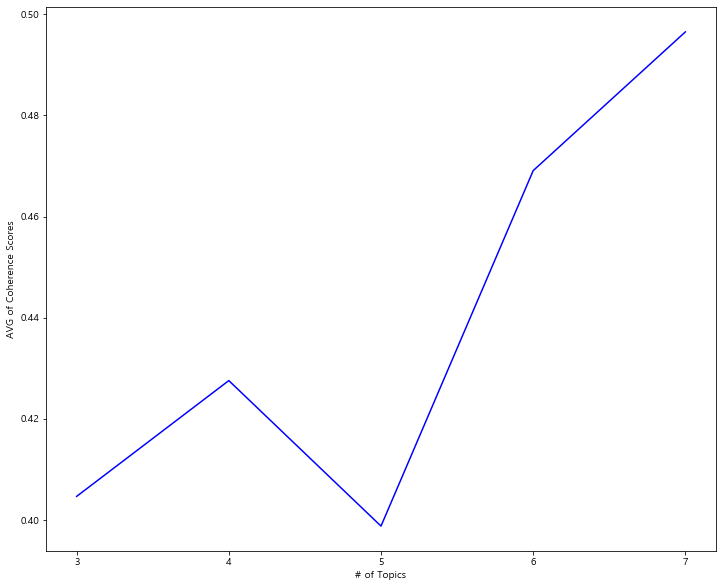

In [21]:
# Coherence Scores Graph
# Set the fonts in Korean to print the coherence scores graph.
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc
%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family = font_name)
elif platform.system() == 'Linux':
    path = '/usr/share/fonts/truetype/malgun/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family = font_name)
else:
    print('Unknown system... sorry~~~~')
    
x = range(start, end, step)

plt.figure(figsize = (12, 10)) 
plt.plot(x, np_cs_avg_list, '-b')
plt.xlabel("# of Topics")
plt.ylabel("AVG of Coherence Scores")
plt.xticks(x)
plt.show()

In [22]:
# The optimal number of coherence scores
dtm_model = model_list[np.argmax(np_cs_avg_list)]
len(dtm_model.print_topics())

7

In [23]:
# The outcome of the applied optimal number of CS: The lists of the model at a certain period
print(dtm_model.print_topics(time = 22, top_terms = 5))

[[('중국', 0.052061598510850265), ('한국', 0.04084961464167712), ('미국', 0.03386672166816021), ('일본', 0.020482477536431162), ('무역', 0.018750735011915046)], [('미국', 0.02334113329146771), ('무역', 0.019713326692949104), ('지수', 0.016923337724356547), ('코스피', 0.015175988684522473), ('중국', 0.01263383067509912)], [('기업', 0.02850488706167605), ('무역', 0.02849193274046282), ('한국', 0.021163722617312326), ('산업', 0.019182606454749142), ('중소기업', 0.016057083382835173)], [('미국', 0.06603500565894281), ('무역', 0.0447406779642428), ('중국', 0.040152333793706856), ('도널드', 0.03518533505661199), ('한국', 0.0338947493753264)], [('무역', 0.09057841052597727), ('협정', 0.0676379556442688), ('자유', 0.0610289571652894), ('경제', 0.029825743091213507), ('북미', 0.016760510902017092)], [('미국', 0.04975599046906066), ('한국', 0.047735781825852516), ('통상', 0.03529280837590698), ('세이프가드', 0.035138681072091886), ('세탁기', 0.03432894022370901)], [('미국', 0.04893997411463249), ('경제', 0.01940098621001865), ('시장', 0.018139748189195413), ('한국', 0.0

In [24]:
# The outcome of the applied optimal number of CS: The lists of the model for a certain topic
dtm_model.print_topic_times(topic = 1, top_terms = 20)

[[('코스피', 0.01697222202075888),
  ('미국', 0.015939472781095993),
  ('투자', 0.01441767586578794),
  ('현대', 0.012895235361087543),
  ('무역', 0.012862858927687446),
  ('외국인', 0.01284738455620097),
  ('반도체', 0.01157784247988946),
  ('수출', 0.011307777247595841),
  ('지수', 0.011284155178208993),
  ('중국', 0.010347483601463339),
  ('증권', 0.010233285842754392),
  ('연구원', 0.009884402558985898),
  ('삼성전자', 0.009037445327257742),
  ('영업', 0.008802289235915549),
  ('삼성', 0.008600212294755386),
  ('가능', 0.008060394556716312),
  ('수입', 0.007910410496503775),
  ('상승세', 0.006745112789742826),
  ('서울', 0.006586768012096423),
  ('전자', 0.00650066809038854)],
 [('코스피', 0.015857193964831377),
  ('미국', 0.015760760885454292),
  ('투자', 0.01375789183750925),
  ('무역', 0.013114317785063044),
  ('현대', 0.012659514974048004),
  ('외국인', 0.012173976919790679),
  ('반도체', 0.01171667943452701),
  ('수출', 0.011712362319216013),
  ('지수', 0.011327087381978667),
  ('중국', 0.010388932220908134),
  ('증권', 0.010270510581389903),
  ('

## 5. Calculating the probability where news would belong to the n-th topic for each period

In [25]:
# Adding the temporal information to indicate the time in which the news was released
doc_time = []

for i in range(len(time_slice)):
    
    for doc_id in range(len(tokenized_data)):
        
        if doc_id < time_slice[i]:
            doc_time.append(i)
            
print(doc_time)
print(len(doc_time))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [26]:
def cumulative_sum(arr, a):
    arr = [0] + arr
    partial_sum = [0] * len(arr)
    
    for i in range(1, len(arr)):
        partial_sum[i] = partial_sum[i-1] + arr[i]
        
    partial_sum = partial_sum[1:]
    # print("partial_sum", partial_sum)
    
    # print("total sum", partial_sum[-1])
    
    return partial_sum[a]

In [27]:
# Select a certain sample size for each time_slot. Refer to time_slice in order to set the proper sample_size.
sample_idx = []
sample_size = 400

for i in range(len(time_slice)):
    if i == 0:
        item = np.random.randint(i, cumulative_sum(time_slice, i), size = sample_size)
    else:
        item = np.random.randint(cumulative_sum(time_slice, i-1), cumulative_sum(time_slice, i), size = sample_size)
    
    sample_idx.append(item)
    
print(sample_idx)

[array([423, 268, 184, 412, 106, 279, 284, 282, 374, 291,  16, 159,  11,
       228, 251, 177, 211, 349,  30, 218, 144, 288, 114, 169, 179, 128,
       232, 381, 398, 364, 264, 125, 343,  50, 200, 347,   8, 416, 410,
       294,  41,   7,  30, 125, 208, 207, 418, 397, 131, 320,   5, 311,
        24, 261,   1,  52,  74, 316, 237, 364, 342,  72, 338, 262,  54,
       236, 150,  81, 421, 224,  37,  25, 191, 257,  74, 189, 389, 215,
       331,  48, 198, 165, 168, 327, 284, 112, 319,  84, 273, 420, 166,
       369, 355,   6,  33, 310, 390, 430, 417,  39, 183, 334, 287,  18,
        17, 424, 244, 273,  70, 336, 233, 345, 313,  51,   1, 313,  17,
       120, 126, 145, 429, 381, 178,   2,  17, 403, 114, 342, 253, 220,
       345, 117,   0,  50, 364,   0, 290, 280, 107,  10,  42, 233, 332,
       388, 183, 294, 341, 264, 270, 284, 178, 343,  31, 422, 430, 403,
       319, 173, 124,  79, 332, 397, 188, 205, 236,  83, 341, 432,  20,
        37, 419, 337,  45,   2,  54, 428, 259, 271, 136, 370,  

In [28]:
processing_docs = []
processing_time = []

sample_indices = np.concatenate(([sample for sample in sample_idx]))

for idx in sample_indices:
    processing_docs.append(tokenized_data[idx])
    processing_time.append(doc_time[idx])
    
print(sample_indices)

[  423   268   184 ... 12261 11467 11818]


In [29]:
print(len(processing_docs))
processing_docs

12400


[['아세안',
  '한국',
  '본부',
  '조정자',
  '필리핀',
  '공식',
  '협상',
  '주년',
  '기조연설',
  '김현종',
  '인상',
  '핵심',
  '교역',
  '장관',
  '회의',
  '연평균',
  '증가'],
 ['중국',
  '한국',
  '전기차',
  '휴대폰',
  '중국',
  '시장',
  '스마트폰',
  '사드',
  '상반기',
  '삼성전자',
  '자동차',
  '현대차',
  '유럽',
  '가전제품',
  '화웨이'],
 ['금융',
  '시장',
  '핵실험',
  '코리아',
  '외국인',
  '코스피',
  '최종구',
  '진웅섭',
  '폐기',
  '사드',
  '고도',
  '미사일',
  '방어',
  '체계',
  '통화',
  '가치',
  '중국'],
 ['중국',
  '전문가',
  '김현욱',
  '통상',
  '임금',
  '최저',
  '임금',
  '전문가',
  '성장',
  '동력',
  '사드',
  '한국개발연구원',
  '연구',
  '미국',
  '자유',
  '무역',
  '협정',
  '핵실험',
  '고고도',
  '만큼',
  '연구',
  '위원',
  '서울',
  '경제',
  '신문',
  '눈앞',
  '홍석우',
  '발등',
  '기업인',
  '위원장',
  '동시',
  '다발',
  '기업',
  '금융',
  '경제',
  '연구',
  '부장',
  '금융',
  '위원장',
  '고고',
  '미사일',
  '방어',
  '체계'],
 ['무역',
  '업계',
  '간담회',
  '백운규',
  '김인호',
  '무역업',
  '자릿수',
  '관계자',
  '소득',
  '증대',
  '수출',
  '기업',
  '산업',
  '연구',
  '개발',
  '드론',
  '유라시아',
  '집중',
  '지원',
  '사항',
  '내수',
  '기업',
  '자리',
  '자율',
  '지원',
  '제도'],
 [

In [30]:
print(len(processing_time))
processing_time

12400


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [31]:
# Calculate the probabilities where each document belongs to an individual topic for each period.
doc_dist = [] 

# dtm_model.doc_topics returns the probability where a document would belong to a specific topic.
for doc_id in sample_indices:
    doc_dist.append(dtm_model.doc_topics(doc_id))

In [32]:
print(doc_dist)

[array([0.21451886, 0.00058582, 0.00058582, 0.00058582, 0.53803059,
       0.16873091, 0.07696217]), array([9.96018580e-01, 6.63570007e-04, 6.63570007e-04, 6.63570007e-04,
       6.63570007e-04, 6.63570007e-04, 6.63570007e-04]), array([0.4485957 , 0.18921247, 0.00058582, 0.00058582, 0.06068882,
       0.00058582, 0.29974554]), array([5.04424074e-01, 2.32180172e-04, 8.23966833e-02, 1.15555531e-01,
       1.00223699e-01, 2.32180172e-04, 1.96935653e-01]), array([7.48922023e-02, 3.83582662e-04, 9.23189884e-01, 3.83582662e-04,
       3.83582662e-04, 3.83582662e-04, 3.83582662e-04]), array([0.29106336, 0.55266338, 0.00090334, 0.15265989, 0.00090334,
       0.00090334, 0.00090334]), array([4.74608448e-04, 5.90917983e-01, 4.06708975e-01, 4.74608448e-04,
       4.74608448e-04, 4.74608448e-04, 4.74608448e-04]), array([4.53103761e-04, 9.44474170e-01, 4.53103761e-04, 5.32603112e-02,
       4.53103761e-04, 4.53103761e-04, 4.53103761e-04]), array([4.98256104e-04, 9.97010463e-01, 4.98256104e-04, 4.98

In [33]:
# Processing doc_dist to shaping it into DataFrame
doc_dist = np.array(doc_dist)
doc_topic_dist = doc_dist.T # Transpose
doc_topic_dist.shape

(7, 12400)

In [34]:
NUM_TOPICS = dtm_model.num_topics

for i in range(NUM_TOPICS):
    print("%f" % doc_dist[0][i], end = ", ")

print()

for i in range(NUM_TOPICS):
    print("%f" % doc_topic_dist[i][0], end = ", ")

0.214519, 0.000586, 0.000586, 0.000586, 0.538031, 0.168731, 0.076962, 
0.214519, 0.000586, 0.000586, 0.000586, 0.538031, 0.168731, 0.076962, 

In [35]:
doc_topic_dist[0].shape

(12400,)

In [36]:
# Shaping DataFrame (Users have to write the codes below to be consistent with the optimal number of topics.)
import pandas as pd

dtm_df = pd.DataFrame({"Time" : processing_time, "Topic0" : doc_topic_dist[0], "Topic1" : doc_topic_dist[1],
                      "Topic2" : doc_topic_dist[2], "Topic3" : doc_topic_dist[3], "Topic4" : doc_topic_dist[4],
                      "Topic5" : doc_topic_dist[5], "Topic6" : doc_topic_dist[6]})

print(dtm_df.head(10))

   Time    Topic0    Topic1    Topic2    Topic3    Topic4    Topic5    Topic6
0     0  0.214519  0.000586  0.000586  0.000586  0.538031  0.168731  0.076962
1     0  0.996019  0.000664  0.000664  0.000664  0.000664  0.000664  0.000664
2     0  0.448596  0.189212  0.000586  0.000586  0.060689  0.000586  0.299746
3     0  0.504424  0.000232  0.082397  0.115556  0.100224  0.000232  0.196936
4     0  0.074892  0.000384  0.923190  0.000384  0.000384  0.000384  0.000384
5     0  0.291063  0.552663  0.000903  0.152660  0.000903  0.000903  0.000903
6     0  0.000475  0.590918  0.406709  0.000475  0.000475  0.000475  0.000475
7     0  0.000453  0.944474  0.000453  0.053260  0.000453  0.000453  0.000453
8     0  0.000498  0.997010  0.000498  0.000498  0.000498  0.000498  0.000498
9     0  0.357150  0.636654  0.001239  0.001239  0.001239  0.001239  0.001239


In [37]:
# Generate groupby object.
doctopic_timeslot = dtm_df.groupby('Time')
doctopic_timeslot.groups

{0: Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
             ...
             390, 391, 392, 393, 394, 395, 396, 397, 398, 399],
            dtype='int64', length=400),
 1: Int64Index([400, 401, 402, 403, 404, 405, 406, 407, 408, 409,
             ...
             790, 791, 792, 793, 794, 795, 796, 797, 798, 799],
            dtype='int64', length=400),
 2: Int64Index([ 800,  801,  802,  803,  804,  805,  806,  807,  808,  809,
             ...
             1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199],
            dtype='int64', length=400),
 3: Int64Index([1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209,
             ...
             1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598, 1599],
            dtype='int64', length=400),
 4: Int64Index([1600, 1601, 1602, 1603, 1604, 1605, 1606, 1607, 1608, 1609,
             ...
             1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999],
            dtype='int64', length=400),
 5: I

In [38]:
# # Calculate the average probabilities for each time slot using mean() function.
timeslot_avg = doctopic_timeslot.mean()
timeslot_avg = timeslot_avg.reset_index()   # index reset
timeslot_avg

Time    Topic0    Topic1    Topic2    Topic3    Topic4    Topic5    Topic6
0      0  0.213854  0.121704  0.217630  0.153888  0.102927  0.104346  0.085651
1      1  0.255359  0.109752  0.322581  0.075843  0.072321  0.104398  0.059747
2      2  0.153279  0.135734  0.225478  0.088539  0.128665  0.180878  0.087427
3      3  0.163146  0.192029  0.323383  0.095953  0.058556  0.110070  0.056863
4      4  0.109908  0.057088  0.037206  0.091292  0.091388  0.582971  0.030148
5      5  0.159331  0.096222  0.120909  0.083758  0.109811  0.233432  0.196538
6      6  0.189273  0.101701  0.208506  0.085796  0.066585  0.129155  0.218984
7      7  0.174042  0.102557  0.299410  0.064822  0.117113  0.162914  0.079142
8      8  0.234291  0.206003  0.218716  0.081354  0.082744  0.109811  0.067080
9      9  0.134690  0.111257  0.225195  0.121554  0.146920  0.211850  0.048534
10    10  0.179943  0.059436  0.219937  0.110264  0.125765  0.176542  0.128112
11    11  0.182876  0.091205  0.242261  0.069513  0.053665  0.300714  0.059764
12    12  0.275078  0.085165  0.326552  0.085518  0.040794  0.119744  0.067148
13    13  0.214430  0.105022  0.414812  0.062211  0.070057  0.070015  0.063455
14    14  0.376457  0.057046  0.194563  0.100109  0.078872  0.078924  0.114028
15    15  0.268684  0.088691  0.275400  0.049694  0.047468  0.185978  0.084084
16    16  0.234509  0.123253  0.314267  0.101395  0.050481  0.115658  0.060437
17    17  0.466282  0.423316  0.000765  0.000765  0.000765  0.000765  0.107342
18    18  0.432277  0.189716  0.205964  0.000652  0.028211  0.000652  0.142528
19    19  0.282173  0.155124  0.212146  0.073431  0.053546  0.132442  0.091137
20    20  0.093364  0.100721  0.120246  0.157113  0.043702  0.330388  0.154467
21    21  0.167959  0.095839  0.139526  0.131239  0.086717  0.315655  0.063066
22    22  0.232420  0.119577  0.260793  0.113138  0.068632  0.099553  0.105886
23    23  0.174679  0.049752  0.192052  0.307099  0.045037  0.194590  0.036791
24    24  0.130618  0.057492  0.142126  0.231870  0.063162  0.313887  0.060845
25    25  0.101669  0.128979  0.099487  0.440376  0.044513  0.104563  0.080413
26    26  0.098220  0.114477  0.074123  0.408621  0.098107  0.137500  0.068953
27    27  0.153846  0.121414  0.120987  0.282170  0.071183  0.143372  0.107028
28    28  0.109746  0.104358  0.115673  0.325663  0.088368  0.128045  0.128146
29    29  0.107028  0.200596  0.164273  0.149753  0.069948  0.218159  0.090242
30    30  0.143225  0.182429  0.100318  0.326416  0.072370  0.059272  0.115970

In [39]:
# The sum of the probabilties for each period is 1.
timeslot_avg.sum(axis = 1)

0      1.0
1      2.0
2      3.0
3      4.0
4      5.0
5      6.0
6      7.0
7      8.0
8      9.0
9     10.0
10    11.0
11    12.0
12    13.0
13    14.0
14    15.0
15    16.0
16    17.0
17    18.0
18    19.0
19    20.0
20    21.0
21    22.0
22    23.0
23    24.0
24    25.0
25    26.0
26    27.0
27    28.0
28    29.0
29    30.0
30    31.0
dtype: float64

## 6. Visualization

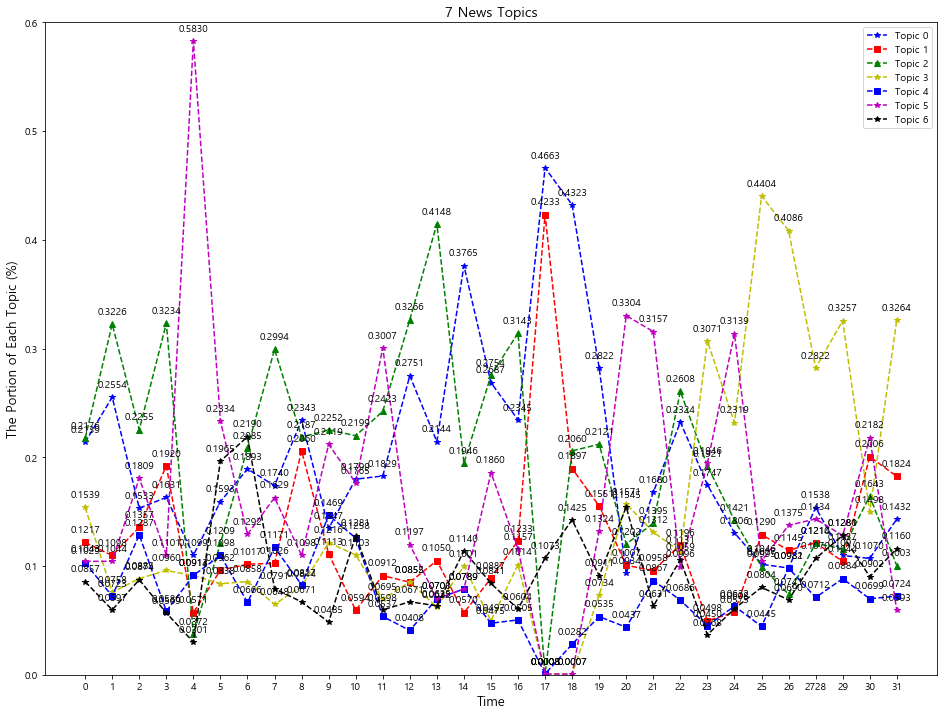

In [40]:
#  Use the codes below to be consistent with the optimal number of topics.
plt.figure(figsize = (16, 12)) 
plt.plot(timeslot_avg['Time'], timeslot_avg['Topic0'], 'b*--', label = 'Topic 0')
plt.plot(timeslot_avg['Time'], timeslot_avg['Topic1'], 'rs--', label = 'Topic 1')
plt.plot(timeslot_avg['Time'], timeslot_avg['Topic2'], 'g^--', label = 'Topic 2')
plt.plot(timeslot_avg['Time'], timeslot_avg['Topic3'], 'y*--', label = 'Topic 3')
plt.plot(timeslot_avg['Time'], timeslot_avg['Topic4'], 'bs--', label = 'Topic 4')
plt.plot(timeslot_avg['Time'], timeslot_avg['Topic5'], 'm*--', label = 'Topic 5')
plt.plot(timeslot_avg['Time'], timeslot_avg['Topic6'], 'k*--', label = 'Topic 6')
# plt.plot(timeslot_avg['Time'], timeslot_avg['Topic7'], 'c*--', label = 'Topic 7')
# plt.plot(timeslot_avg['Time'], timeslot_avg['Topic7'], 'c*--', label = 'Topic 8')
# plt.plot(timeslot_avg['Time'], timeslot_avg['Topic7'], 'c*--', label = 'Topic 9')
# plt.plot(timeslot_avg['Time'], timeslot_avg['Topic7'], 'c*--', label = 'Topic 10')
# plt.plot(timeslot_avg['Time'], timeslot_avg['Topic7'], 'c*--', label = 'Topic 11')

for topic_id in ['Topic0', 'Topic1', 'Topic2', 'Topic3', 'Topic4', 'Topic5', 'Topic6']:
    for x, y in zip(range(len(time_slice)), timeslot_avg[topic_id]):
        plt.annotate("%.4f"%y, (x, y), textcoords = "offset points", xytext=(0,10), ha = 'center')

plt.title("7 News Topics", fontsize = 14)
plt.xlabel("Time", fontsize = 13)
plt.ylabel("The Portion of Each Topic (%)", fontsize = 13)
plt.xticks(timeslot_avg['Time'], ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27' '28', '29', '30', '31']) # 분석 대상 기간에 상응하게 조정
plt.ylim([0.0, 0.6])
plt.legend(loc = "best")
plt.savefig("trade_news_topic_distribution_graph.png")
plt.show()

In [41]:
# Save the results as a csv file. Some periods show spikes due to lack of observations.
timeslot_avg.to_csv('data/trade(DTM).csv', sep=',')